-------------------------------------------------------------
Libs e Preparação do ambiente Spark
-------------------------------------------------------------



In [1]:
# Java jdk utilitários 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [4]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [5]:
# Findspark
!pip install -q findspark

In [6]:
import findspark

# Iniciando o findspark
findspark.init()

In [7]:
# iniciar uma seção Spark
from pyspark.sql import SparkSession

# iniciando o spark context
spark = SparkSession.builder.master('local[*]').getOrCreate()
spark

In [22]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType
from datetime import date,datetime
from pyspark.sql import Row
from pyspark.sql.context import SQLContext

In [ ]:
#-----------------
#Abrindo um CSV
#pyspark.rdd.RDD
#-----------------

#file= spark.sparkContext.textFile('/content/food_coded.csv')

#type(file) #pyspark.rdd.RDD


In [12]:
#-----------------
#Abrindo um CSV
#pyspark.sql.dataframe.DataFrame
#-----------------

file=spark.read.csv('/content/Bikes.csv',header=True,sep=',',nanValue=None)


#type(file) #pyspark.sql.dataframe.DataFrame
file.show()
#Classes de file

#file.printSchema()

+--------------------+--------+---------+----------+------------+---+-----+-------------+
|           bike_name|   price|     city|kms_driven|       owner|age|power|        brand|
+--------------------+--------+---------+----------+------------+---+-----+-------------+
|TVS Star City Plu...| 35000.0|Ahmedabad|   17654.0| First Owner|3.0|110.0|          TVS|
|Royal Enfield Cla...|119900.0|    Delhi|   11000.0| First Owner|4.0|350.0|Royal Enfield|
|Triumph Daytona 675R|600000.0|    Delhi|     110.0| First Owner|8.0|675.0|      Triumph|
|TVS Apache RTR 180cc| 65000.0|Bangalore|   16329.0| First Owner|4.0|180.0|          TVS|
|Yamaha FZ S V 2.0...| 80000.0|Bangalore|   10000.0| First Owner|3.0|150.0|       Yamaha|
|    Yamaha FZs 150cc| 53499.0|    Delhi|   25000.0| First Owner|6.0|150.0|       Yamaha|
|Honda CB Hornet 1...| 85000.0|    Delhi|    8200.0| First Owner|3.0|160.0|        Honda|
|Hero Splendor Plu...| 45000.0|    Delhi|   12645.0| First Owner|3.0|100.0|         Hero|
|Royal Enf

**Criando uma tabela temporária para consultas com SQL**
----------------------------------------------------------- 






In [24]:
#criando um objeto sparksession object e um appName 

sparkSession=SparkSession.builder.appName("bikes").getOrCreate()

In [26]:
#tabela temporária em memória com os dados para SQL
file.createOrReplaceTempView("tab_bikes")
sparkSession.sql("select * from tab_bikes")

DataFrame[bike_name: string, price: string, city: string, kms_driven: string, owner: string, age: string, power: string, brand: string]

In [30]:
# maior média de km percorridos na sequencia do maior -> menor
sparkSession.sql("select city, avg(kms_driven) as media_km from tab_bikes group by city order by media_km desc ").show()

+------------------+------------------+
|              city|          media_km|
+------------------+------------------+
|     Muzaffarnagar|          403833.0|
|           Vidisha|          172082.0|
|            Ranoli|          135000.0|
|           Navsari|          111224.0|
|         Osmanabad|           80000.0|
|         Kartarpur|           75000.0|
|             Latur|           71000.0|
|          Motihari|           69000.0|
|             Hisar|           65000.0|
|         Gangaghat|           65000.0|
|         Darbhanga|           61331.5|
|           Jaunpur|           61000.0|
|            Jaipur| 60106.93346573982|
|           Raiwala|           60000.0|
|             Morbi|           60000.0|
|       Chikamaglur|           60000.0|
|             Nabha|           59154.0|
|Thiruvananthapuram|58166.666666666664|
|             Rasra|           58000.0|
|              Bhuj|           54400.0|
+------------------+------------------+
only showing top 20 rows



In [31]:
# Maior km alcançada
sparkSession.sql("select city, max(kms_driven) as maximo_km from tab_bikes group by city order by maximo_km desc").show(1)

+---------+---------+
|     city|maximo_km|
+---------+---------+
|Faridabad|  99999.0|
+---------+---------+
only showing top 1 row



In [32]:
# Menor km alcançada
sparkSession.sql("select city, min(kms_driven) as minimo_km from tab_bikes group by city order by minimo_km asc").show(1)

+------+---------+
|  city|minimo_km|
+------+---------+
|Nashik|      1.0|
+------+---------+
only showing top 1 row



In [33]:
# Média de potencia das bicicletas por cidade
sparkSession.sql("select brand, avg(power) as media_potencia, count(*) as total from tab_bikes group by brand order by total desc").show()

+---------------+------------------+-----+
|          brand|    media_potencia|total|
+---------------+------------------+-----+
|          Bajaj|196.31454561669491|11213|
|           Hero|116.17996231155779| 6368|
|  Royal Enfield| 366.1045955002393| 4178|
|         Yamaha|169.35010214504595| 3916|
|          Honda|152.67314990512335| 2108|
|         Suzuki| 138.2445355191257| 1464|
|            TVS| 170.9943865276664| 1247|
|            KTM| 346.7595171773445| 1077|
|Harley-Davidson| 758.2048846675713|  737|
|       Kawasaki| 570.8860759493671|   79|
|        Hyosung|             400.0|   64|
|        Benelli| 380.2857142857143|   56|
|       Mahindra| 192.9090909090909|   55|
|        Triumph| 893.0769230769231|   26|
|         Ducati|1016.1363636363636|   22|
|            BMW|            463.75|   16|
|           Jawa|             295.0|   10|
|             MV|             872.5|    4|
|         Indian|1353.3333333333333|    3|
|          Ideal|             250.0|    2|
+----------

In [37]:
# Bajaj (maior quantidade de registros) 
bajaj=sparkSession.sql("select * from tab_bikes where brand='Bajaj'")

# tabela temporária 
bajaj.createOrReplaceTempView("tab_bikes2")


#type(bajaj) #pyspark.sql.dataframe.DataFrame

sparkSession.sql("select count(*) from tab_bikes2").show()

+--------+
|count(1)|
+--------+
|   11213|
+--------+



In [39]:
#Max,Min e med
sparkSession.sql("select avg(kms_driven) as media,max(kms_driven) as maximo,min(kms_driven) as minimo from tab_bikes").show()

+------------------+-------+------+
|             media| maximo|minimo|
+------------------+-------+------+
|26344.625183778484|99999.0|   1.0|
+------------------+-------+------+



In [42]:
#Tipos de bike em Bajaj (max,med,min)
sparkSession.sql("select bike_name, avg(kms_driven) as media,max(kms_driven) as maximo,min(kms_driven) as minimo from tab_bikes group by bike_name order by 1 asc").show(12)

+--------------------+------------------+-------+-------+
|           bike_name|             media| maximo| minimo|
+--------------------+------------------+-------+-------+
|   BMW F750 GS 850cc|            4600.0| 4600.0| 4600.0|
|        BMW G 310 GS|11068.333333333334| 4241.0|14482.0|
|         BMW G 310 R| 8314.444444444445| 8500.0|11000.0|
|   BMW S 1000 RR Pro|            2600.0| 2600.0| 2600.0|
|   BMW S 1000 XR Pro|           18000.0|18000.0|18000.0|
| Bajaj  Pulsar 180cc|           44815.6|90393.0|14524.0|
| Bajaj Avenger 150cc|           20850.0|20850.0|20850.0|
| Bajaj Avenger 180cc|           30312.0|30312.0|30312.0|
| Bajaj Avenger 200cc|35448.555555555555|62554.0|24500.0|
| Bajaj Avenger 220cc| 35184.07330097087| 9370.0|10000.0|
|Bajaj Avenger Cru...|15913.819444444445| 9900.0|10000.0|
|Bajaj Avenger Cru...|            1958.0| 1958.0| 1958.0|
+--------------------+------------------+-------+-------+
only showing top 12 rows



In [43]:
# como foram adquiridas as Bikes
sparkSession.sql("select owner,count(*) as total from tab_bikes group by owner order by 2 desc").show()

+--------------------+-----+
|               owner|total|
+--------------------+-----+
|         First Owner|29964|
|        Second Owner| 2564|
|         Third Owner|  108|
|Fourth Owner Or More|   12|
+--------------------+-----+



# Plot de tabelas no formato Pandas
----------------------------------------

In [45]:
#Plot do df

bajaj_df=sparkSession.sql("select owner,count(*) as total from tab_bikes group by owner order by 2 desc")


#converter o pyspark.sql.dataframe.DataFrame em Pandas
bajaj_pandas= bajaj_df.toPandas()

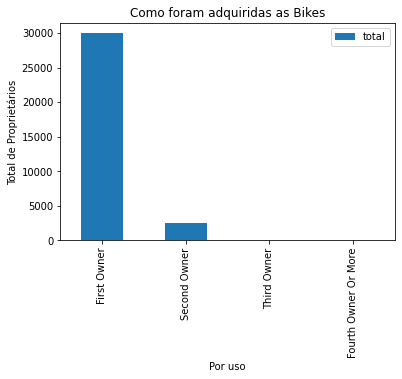

In [47]:
import matplotlib.pyplot as plotar


bajaj_pandas.plot(kind='bar',x='owner',y='total')
plotar.title('Como foram adquiridas as Bikes')
plotar.xlabel('Por uso')
plotar.ylabel('Total de Proprietários')
plotar.show()